# Exciton Model for vdWHs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase.units
from default_parameters import get_thickness

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [4]:
materials = ['WS2','MoS2','WSe2','MoSe2']
nFilling = 3
nPadding = 0
vdWH_data = np.load('wannier_analytic_nFilling={}_nPadding={}.npz'.format(nFilling, nPadding))

In [5]:
E_b_heat_mat = vdWH_data['E_b_heat_mat']
E_b_heat_xlabels = vdWH_data['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_data['E_b_heat_ylabels']

In [6]:
def heatmap(data, xlabels, ylabels, cbarlabel, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, **kwargs)
    plt.xticks(np.arange(len(xlabels)), labels=xlabels)
    plt.yticks(np.arange(len(ylabels)), labels=ylabels)
    plt.colorbar(label=cbarlabel)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            colors = ['k', 'w']
            color = colors[int(data[i,j] > np.mean(data))]
            plt.text(j, i, data[i, j], ha="center", va="center", color=color)

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers


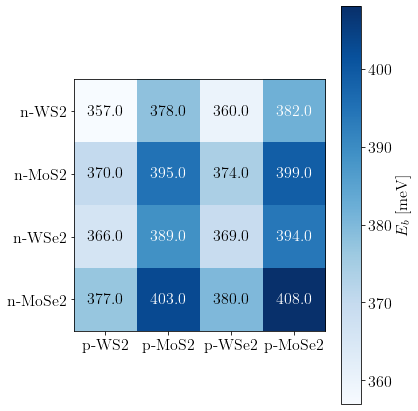

In [7]:
fig = plt.figure(1, figsize=(6,6))

description = 'Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers'.format(nPadding, nFilling)
print(description)
heatmap(np.round(E_b_heat_mat*10**3),
    E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV]',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_E_b_analytic.svg')
plt.savefig('./plots/vdWH_E_b_analytic.png')
plt.show()

[[0.16746269 0.20337209 0.17217391 0.21032967]
 [0.18987013 0.23739583 0.19594937 0.24693069]
 [0.18164384 0.22467391 0.1872     0.23319588]
 [0.20072289 0.25460784 0.20752941 0.26560748]]


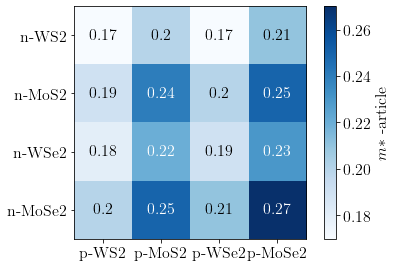

In [9]:
#effective masses that we use
me_vec=np.array([0.33,0.43,0.39,0.49])
mh_vec=np.array([0.34,0.53,0.36,0.58])

mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
print(mu_matrix)
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$m*$ -article',
    cmap='Blues')        
plt.tight_layout()
plt.savefig('./plots/vdWH_excMass_QEH.svg')
plt.savefig('./plots/vdWH_excMass_QEH.png')
plt.show()

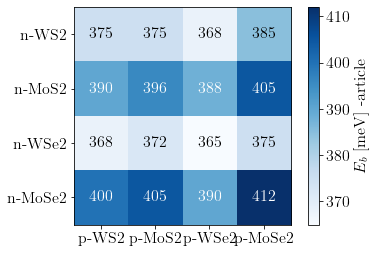

In [108]:
#data from article
me_vec=np.array([0.33,0.40,0.36,0.43])
mh_vec=np.array([0.30,0.48,0.30,0.50])

mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
Eb_matrix=np.array([[396,405,390,388],[405,412,400,390],[375,385,375,368],[372,375,368,365]])
Eb_matrix=np.array([[375,375,368,385],[390,396,388,405],[368,372,365,375],[400,405,390,412]])
heatmap(np.round(Eb_matrix),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] -article',
    cmap='Blues')


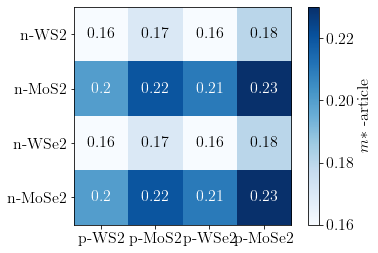

In [110]:
#print(np.round(mu_matrix,2))
#heatmap(np.round(mu_matrix,2),
#            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$m*$ -article',
#    cmap='Blues')
heatmap(np.round(mu_matrix.transpose(),2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$m*$ -article',
    cmap='Blues')

# Herunder prøvede jeg at teste numerisk at mit analytiske udtryk var korrekt - det gik ikke så godt, og det kan også være ligemeget

In [46]:
dr=0.01
dphi=0.01
rVec=np.arange(0,10**2*2,dr)
phiVec=np.arange(0,2*np.pi,dphi)
def f(r,d):
    return 1/np.sqrt(r**2+d**2)
print(f(rVec[-1],10))
def Integrand1(r,phi,q,d):
    return f(r,d)*r*np.cos(q*r*np.cos(phi))
def Integrand2(r,phi,q,d):
    return f(r,d)*r*np.sin(q*r*np.cos(phi))
def fq(q,d):
    return -2*np.pi/q*np.exp(-d*q)
qVec=np.arange(0.01,1,1)
qVec=np.array([4])
d=0.1
Vq=np.zeros((len(qVec)))
for i,q in enumerate(qVec):
    print(q,i)
    Vq=0
    for r in rVec:
        print(r)
        for phi in phiVec:
            Vq+=Integrand1(r,phi,q,d)*dr*dphi
    print(Vq)
print(Vq)
print(fq(q,d))

0.004994010772217694
4 0
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.

12.280000000000001
12.290000000000001
12.3
12.31
12.32
12.33
12.34
12.35
12.36
12.370000000000001
12.38
12.39
12.4
12.41
12.42
12.43
12.44
12.450000000000001
12.46
12.47
12.48
12.49
12.5
12.51
12.52
12.530000000000001
12.540000000000001
12.55
12.56
12.57
12.58
12.59
12.6
12.61
12.620000000000001
12.63
12.64
12.65
12.66
12.67
12.68
12.69
12.700000000000001
12.71
12.72
12.73
12.74
12.75
12.76
12.77
12.780000000000001
12.790000000000001
12.8
12.81
12.82
12.83
12.84
12.85
12.86
12.870000000000001
12.88
12.89
12.9
12.91
12.92
12.93
12.94
12.950000000000001
12.96
12.97
12.98
12.99
13.0
13.01
13.02
13.030000000000001
13.040000000000001
13.05
13.06
13.07
13.08
13.09
13.1
13.11
13.120000000000001
13.13
13.14
13.15
13.16
13.17
13.18
13.19
13.200000000000001
13.21
13.22
13.23
13.24
13.25
13.26
13.27
13.280000000000001
13.290000000000001
13.3
13.31
13.32
13.33
13.34
13.35
13.36
13.370000000000001
13.38
13.39
13.4
13.41
13.42
13.43
13.44
13.450000000000001
13.46
13.47
13.48
13.49
13.5
13.51
13.52
1

23.11
23.12
23.13
23.14
23.150000000000002
23.16
23.17
23.18
23.19
23.2
23.21
23.22
23.23
23.240000000000002
23.25
23.26
23.27
23.28
23.29
23.3
23.31
23.32
23.330000000000002
23.34
23.35
23.36
23.37
23.38
23.39
23.400000000000002
23.41
23.42
23.43
23.44
23.45
23.46
23.47
23.48
23.490000000000002
23.5
23.51
23.52
23.53
23.54
23.55
23.56
23.57
23.580000000000002
23.59
23.6
23.61
23.62
23.63
23.64
23.650000000000002
23.66
23.67
23.68
23.69
23.7
23.71
23.72
23.73
23.740000000000002
23.75
23.76
23.77
23.78
23.79
23.8
23.81
23.82
23.830000000000002
23.84
23.85
23.86
23.87
23.88
23.89
23.900000000000002
23.91
23.92
23.93
23.94
23.95
23.96
23.97
23.98
23.990000000000002
24.0
24.01
24.02
24.03
24.04
24.05
24.060000000000002
24.07
24.080000000000002
24.09
24.1
24.11
24.12
24.13
24.14
24.150000000000002
24.16
24.17
24.18
24.19
24.2
24.21
24.22
24.23
24.240000000000002
24.25
24.26
24.27
24.28
24.29
24.3
24.310000000000002
24.32
24.330000000000002
24.34
24.35
24.36
24.37
24.38
24.39
24.400000000000

33.67
33.68
33.69
33.7
33.71
33.72
33.730000000000004
33.74
33.75
33.76
33.77
33.78
33.79
33.8
33.81
33.82
33.83
33.84
33.85
33.86
33.87
33.88
33.89
33.9
33.910000000000004
33.92
33.93
33.94
33.95
33.96
33.97
33.980000000000004
33.99
34.0
34.01
34.02
34.03
34.04
34.05
34.06
34.07
34.08
34.09
34.1
34.11
34.12
34.13
34.14
34.15
34.160000000000004
34.17
34.18
34.19
34.2
34.21
34.22
34.230000000000004
34.24
34.25
34.26
34.27
34.28
34.29
34.300000000000004
34.31
34.32
34.33
34.34
34.35
34.36
34.37
34.38
34.39
34.4
34.410000000000004
34.42
34.43
34.44
34.45
34.46
34.47
34.480000000000004
34.49
34.5
34.51
34.52
34.53
34.54
34.550000000000004
34.56
34.57
34.58
34.59
34.6
34.61
34.62
34.63
34.64
34.65
34.660000000000004
34.67
34.68
34.69
34.7
34.71
34.72
34.730000000000004
34.74
34.75
34.76
34.77
34.78
34.79
34.800000000000004
34.81
34.82
34.83
34.84
34.85
34.86
34.87
34.88
34.89
34.9
34.910000000000004
34.92
34.93
34.94
34.95
34.96
34.97
34.980000000000004
34.99
35.0
35.01
35.02
35.03
35.04
35

44.85
44.86
44.87
44.88
44.89
44.9
44.910000000000004
44.92
44.93
44.94
44.95
44.96
44.97
44.980000000000004
44.99
45.0
45.01
45.02
45.03
45.04
45.050000000000004
45.06
45.07
45.08
45.09
45.1
45.11
45.12
45.13
45.14
45.15
45.160000000000004
45.17
45.18
45.19
45.2
45.21
45.22
45.230000000000004
45.24
45.25
45.26
45.27
45.28
45.29
45.300000000000004
45.31
45.32
45.33
45.34
45.35
45.36
45.37
45.38
45.39
45.4
45.410000000000004
45.42
45.43
45.44
45.45
45.46
45.47
45.480000000000004
45.49
45.5
45.51
45.52
45.53
45.54
45.550000000000004
45.56
45.57
45.58
45.59
45.6
45.61
45.62
45.63
45.64
45.65
45.660000000000004
45.67
45.68
45.69
45.7
45.71
45.72
45.730000000000004
45.74
45.75
45.76
45.77
45.78
45.79
45.800000000000004
45.81
45.82
45.83
45.84
45.85
45.86
45.87
45.88
45.89
45.9
45.910000000000004
45.92
45.93
45.94
45.95
45.96
45.97
45.980000000000004
45.99
46.0
46.01
46.02
46.03
46.04
46.050000000000004
46.06
46.07
46.08
46.09
46.1
46.11
46.12
46.13
46.14
46.15
46.160000000000004
46.17
46.18

55.34
55.35
55.36
55.370000000000005
55.38
55.39
55.4
55.410000000000004
55.42
55.43
55.44
55.45
55.46
55.47
55.480000000000004
55.49
55.5
55.51
55.52
55.53
55.54
55.550000000000004
55.56
55.57
55.58
55.59
55.6
55.61
55.620000000000005
55.63
55.64
55.65
55.660000000000004
55.67
55.68
55.69
55.7
55.71
55.72
55.730000000000004
55.74
55.75
55.76
55.77
55.78
55.79
55.800000000000004
55.81
55.82
55.83
55.84
55.85
55.86
55.870000000000005
55.88
55.89
55.9
55.910000000000004
55.92
55.93
55.94
55.95
55.96
55.97
55.980000000000004
55.99
56.0
56.01
56.02
56.03
56.04
56.050000000000004
56.06
56.07
56.08
56.09
56.1
56.11
56.120000000000005
56.13
56.14
56.15
56.160000000000004
56.17
56.18
56.19
56.2
56.21
56.22
56.230000000000004
56.24
56.25
56.26
56.27
56.28
56.29
56.300000000000004
56.31
56.32
56.33
56.34
56.35
56.36
56.370000000000005
56.38
56.39
56.4
56.410000000000004
56.42
56.43
56.44
56.45
56.46
56.47
56.480000000000004
56.49
56.5
56.51
56.52
56.53
56.54
56.550000000000004
56.56
56.57
56.58


65.93
65.94
65.95
65.96000000000001
65.97
65.98
65.99
66.0
66.01
66.02
66.03
66.04
66.05
66.06
66.07000000000001
66.08
66.09
66.1
66.11
66.12
66.13
66.14
66.15
66.16
66.17
66.18
66.19
66.2
66.21000000000001
66.22
66.23
66.24
66.25
66.26
66.27
66.28
66.29
66.3
66.31
66.32000000000001
66.33
66.34
66.35
66.36
66.37
66.38
66.39
66.4
66.41
66.42
66.43
66.44
66.45
66.46000000000001
66.47
66.48
66.49
66.5
66.51
66.52
66.53
66.54
66.55
66.56
66.57000000000001
66.58
66.59
66.6
66.61
66.62
66.63
66.64
66.65
66.66
66.67
66.68
66.69
66.7
66.71000000000001
66.72
66.73
66.74
66.75
66.76
66.77
66.78
66.79
66.8
66.81
66.82000000000001
66.83
66.84
66.85
66.86
66.87
66.88
66.89
66.9
66.91
66.92
66.93
66.94
66.95
66.96000000000001
66.97
66.98
66.99
67.0
67.01
67.02
67.03
67.04
67.05
67.06
67.07000000000001
67.08
67.09
67.1
67.11
67.12
67.13
67.14
67.15
67.16
67.17
67.18
67.19
67.2
67.21000000000001
67.22
67.23
67.24
67.25
67.26
67.27
67.28
67.29
67.3
67.31
67.32000000000001
67.33
67.34
67.35
67.36
67.37


77.49
77.5
77.51
77.52
77.53
77.54
77.55
77.56
77.57000000000001
77.58
77.59
77.60000000000001
77.61
77.62
77.63
77.64
77.65
77.66
77.67
77.68
77.69
77.7
77.71000000000001
77.72
77.73
77.74
77.75
77.76
77.77
77.78
77.79
77.8
77.81
77.82000000000001
77.83
77.84
77.85000000000001
77.86
77.87
77.88
77.89
77.9
77.91
77.92
77.93
77.94
77.95
77.96000000000001
77.97
77.98
77.99
78.0
78.01
78.02
78.03
78.04
78.05
78.06
78.07000000000001
78.08
78.09
78.10000000000001
78.11
78.12
78.13
78.14
78.15
78.16
78.17
78.18
78.19
78.2
78.21000000000001
78.22
78.23
78.24
78.25
78.26
78.27
78.28
78.29
78.3
78.31
78.32000000000001
78.33
78.34
78.35000000000001
78.36
78.37
78.38
78.39
78.4
78.41
78.42
78.43
78.44
78.45
78.46000000000001
78.47
78.48
78.49
78.5
78.51
78.52
78.53
78.54
78.55
78.56
78.57000000000001
78.58
78.59
78.60000000000001
78.61
78.62
78.63
78.64
78.65
78.66
78.67
78.68
78.69
78.7
78.71000000000001
78.72
78.73
78.74
78.75
78.76
78.77
78.78
78.79
78.8
78.81
78.82000000000001
78.83
78.84
78.

88.72
88.73
88.74
88.75
88.76
88.77
88.78
88.79
88.8
88.81
88.82000000000001
88.83
88.84
88.85000000000001
88.86
88.87
88.88
88.89
88.9
88.91
88.92
88.93
88.94
88.95
88.96000000000001
88.97
88.98
88.99
89.0
89.01
89.02
89.03
89.04
89.05
89.06
89.07000000000001
89.08
89.09
89.10000000000001
89.11
89.12
89.13
89.14
89.15
89.16
89.17
89.18
89.19
89.2
89.21000000000001
89.22
89.23
89.24
89.25
89.26
89.27
89.28
89.29
89.3
89.31
89.32000000000001
89.33
89.34
89.35000000000001
89.36
89.37
89.38
89.39
89.4
89.41
89.42
89.43
89.44
89.45
89.46000000000001
89.47
89.48
89.49
89.5
89.51
89.52
89.53
89.54
89.55
89.56
89.57000000000001
89.58
89.59
89.60000000000001
89.61
89.62
89.63
89.64
89.65
89.66
89.67
89.68
89.69
89.7
89.71000000000001
89.72
89.73
89.74
89.75
89.76
89.77
89.78
89.79
89.8
89.81
89.82000000000001
89.83
89.84
89.85000000000001
89.86
89.87
89.88
89.89
89.9
89.91
89.92
89.93
89.94
89.95
89.96000000000001
89.97
89.98
89.99
90.0
90.01
90.02
90.03
90.04
90.05
90.06
90.07000000000001
90.

99.61
99.62
99.63
99.64
99.65
99.66
99.67
99.68
99.69
99.7
99.71000000000001
99.72
99.73
99.74000000000001
99.75
99.76
99.77
99.78
99.79
99.8
99.81
99.82000000000001
99.83
99.84
99.85000000000001
99.86
99.87
99.88
99.89
99.9
99.91
99.92
99.93
99.94
99.95
99.96000000000001
99.97
99.98
99.99000000000001
100.0
100.01
100.02
100.03
100.04
100.05
100.06
100.07000000000001
100.08
100.09
100.10000000000001
100.11
100.12
100.13
100.14
100.15
100.16
100.17
100.18
100.19
100.2
100.21000000000001
100.22
100.23
100.24000000000001
100.25
100.26
100.27
100.28
100.29
100.3
100.31
100.32000000000001
100.33
100.34
100.35000000000001
100.36
100.37
100.38
100.39
100.4
100.41
100.42
100.43
100.44
100.45
100.46000000000001
100.47
100.48
100.49000000000001
100.5
100.51
100.52
100.53
100.54
100.55
100.56
100.57000000000001
100.58
100.59
100.60000000000001
100.61
100.62
100.63
100.64
100.65
100.66
100.67
100.68
100.69
100.7
100.71000000000001
100.72
100.73
100.74000000000001
100.75
100.76
100.77
100.78
100.79

109.19
109.2
109.21000000000001
109.22
109.23
109.24000000000001
109.25
109.26
109.27
109.28
109.29
109.3
109.31
109.32000000000001
109.33
109.34
109.35000000000001
109.36
109.37
109.38
109.39
109.4
109.41
109.42
109.43
109.44
109.45
109.46000000000001
109.47
109.48
109.49000000000001
109.5
109.51
109.52
109.53
109.54
109.55
109.56
109.57000000000001
109.58
109.59
109.60000000000001
109.61
109.62
109.63
109.64
109.65
109.66
109.67
109.68
109.69
109.7
109.71000000000001
109.72
109.73
109.74000000000001
109.75
109.76
109.77
109.78
109.79
109.8
109.81
109.82000000000001
109.83
109.84
109.85000000000001
109.86
109.87
109.88
109.89
109.9
109.91
109.92
109.93
109.94
109.95
109.96000000000001
109.97
109.98
109.99000000000001
110.0
110.01
110.02
110.03
110.04
110.05
110.06
110.07000000000001
110.08
110.09
110.10000000000001
110.11
110.12
110.13
110.14
110.15
110.16
110.17
110.18
110.19
110.2
110.21000000000001
110.22
110.23
110.24000000000001
110.25
110.26
110.27
110.28
110.29
110.3
110.31
110

118.74000000000001
118.75
118.76
118.77
118.78
118.79
118.8
118.81
118.82000000000001
118.83
118.84
118.85000000000001
118.86
118.87
118.88
118.89
118.9
118.91
118.92
118.93
118.94
118.95
118.96000000000001
118.97
118.98
118.99000000000001
119.0
119.01
119.02
119.03
119.04
119.05
119.06
119.07000000000001
119.08
119.09
119.10000000000001
119.11
119.12
119.13
119.14
119.15
119.16
119.17
119.18
119.19
119.2
119.21000000000001
119.22
119.23
119.24000000000001
119.25
119.26
119.27
119.28
119.29
119.3
119.31
119.32000000000001
119.33
119.34
119.35000000000001
119.36
119.37
119.38
119.39
119.4
119.41
119.42
119.43
119.44
119.45
119.46000000000001
119.47
119.48
119.49000000000001
119.5
119.51
119.52
119.53
119.54
119.55
119.56
119.57000000000001
119.58
119.59
119.60000000000001
119.61
119.62
119.63
119.64
119.65
119.66
119.67
119.68
119.69
119.7
119.71000000000001
119.72
119.73
119.74000000000001
119.75
119.76
119.77
119.78
119.79
119.8
119.81
119.82000000000001
119.83
119.84
119.850000000000

127.87
127.88000000000001
127.89
127.9
127.91
127.92
127.93
127.94
127.95
127.96000000000001
127.97
127.98
127.99000000000001
128.0
128.01
128.02
128.03
128.04
128.05
128.06
128.07
128.08
128.09
128.1
128.11
128.12
128.13
128.14000000000001
128.15
128.16
128.17000000000002
128.18
128.19
128.2
128.21
128.22
128.23
128.24
128.25
128.26
128.27
128.28
128.29
128.3
128.31
128.32
128.33
128.34
128.35
128.36
128.37
128.38
128.39000000000001
128.4
128.41
128.42000000000002
128.43
128.44
128.45
128.46
128.47
128.48
128.49
128.5
128.51
128.52
128.53
128.54
128.55
128.56
128.57
128.58
128.59
128.6
128.61
128.62
128.63
128.64000000000001
128.65
128.66
128.67000000000002
128.68
128.69
128.7
128.71
128.72
128.73
128.74
128.75
128.76
128.77
128.78
128.79
128.8
128.81
128.82
128.83
128.84
128.85
128.86
128.87
128.88
128.89000000000001
128.9
128.91
128.92000000000002
128.93
128.94
128.95
128.96
128.97
128.98
128.99
129.0
129.01
129.02
129.03
129.04
129.05
129.06
129.07
129.08
129.09
129.1
129.11
129.12

138.42000000000002
138.43
138.44
138.45000000000002
138.46
138.47
138.48
138.49
138.5
138.51
138.52
138.53
138.54
138.55
138.56
138.57
138.58
138.59
138.6
138.61
138.62
138.63
138.64000000000001
138.65
138.66
138.67000000000002
138.68
138.69
138.70000000000002
138.71
138.72
138.73
138.74
138.75
138.76
138.77
138.78
138.79
138.8
138.81
138.82
138.83
138.84
138.85
138.86
138.87
138.88
138.89000000000001
138.9
138.91
138.92000000000002
138.93
138.94
138.95000000000002
138.96
138.97
138.98
138.99
139.0
139.01
139.02
139.03
139.04
139.05
139.06
139.07
139.08
139.09
139.1
139.11
139.12
139.13
139.14000000000001
139.15
139.16
139.17000000000002
139.18
139.19
139.20000000000002
139.21
139.22
139.23
139.24
139.25
139.26
139.27
139.28
139.29
139.3
139.31
139.32
139.33
139.34
139.35
139.36
139.37
139.38
139.39000000000001
139.4
139.41
139.42000000000002
139.43
139.44
139.45000000000002
139.46
139.47
139.48
139.49
139.5
139.51
139.52
139.53
139.54
139.55
139.56
139.57
139.58
139.59
139.6
139.61
13

148.5
148.51
148.52
148.53
148.54
148.55
148.56
148.57
148.58
148.59
148.6
148.61
148.62
148.63
148.64000000000001
148.65
148.66
148.67000000000002
148.68
148.69
148.70000000000002
148.71
148.72
148.73
148.74
148.75
148.76
148.77
148.78
148.79
148.8
148.81
148.82
148.83
148.84
148.85
148.86
148.87
148.88
148.89000000000001
148.9
148.91
148.92000000000002
148.93
148.94
148.95000000000002
148.96
148.97
148.98
148.99
149.0
149.01
149.02
149.03
149.04
149.05
149.06
149.07
149.08
149.09
149.1
149.11
149.12
149.13
149.14000000000001
149.15
149.16
149.17000000000002
149.18
149.19
149.20000000000002
149.21
149.22
149.23
149.24
149.25
149.26
149.27
149.28
149.29
149.3
149.31
149.32
149.33
149.34
149.35
149.36
149.37
149.38
149.39000000000001
149.4
149.41
149.42000000000002
149.43
149.44
149.45000000000002
149.46
149.47
149.48
149.49
149.5
149.51
149.52
149.53
149.54
149.55
149.56
149.57
149.58
149.59
149.6
149.61
149.62
149.63
149.64000000000001
149.65
149.66
149.67000000000002
149.68
149.69
14

158.59
158.6
158.61
158.62
158.63
158.64000000000001
158.65
158.66
158.67000000000002
158.68
158.69
158.70000000000002
158.71
158.72
158.73
158.74
158.75
158.76
158.77
158.78
158.79
158.8
158.81
158.82
158.83
158.84
158.85
158.86
158.87
158.88
158.89000000000001
158.9
158.91
158.92000000000002
158.93
158.94
158.95000000000002
158.96
158.97
158.98
158.99
159.0
159.01
159.02
159.03
159.04
159.05
159.06
159.07
159.08
159.09
159.1
159.11
159.12
159.13
159.14000000000001
159.15
159.16
159.17000000000002
159.18
159.19
159.20000000000002
159.21
159.22
159.23
159.24
159.25
159.26
159.27
159.28
159.29
159.3
159.31
159.32
159.33
159.34
159.35
159.36
159.37
159.38
159.39000000000001
159.4
159.41
159.42000000000002
159.43
159.44
159.45000000000002
159.46
159.47
159.48
159.49
159.5
159.51
159.52
159.53
159.54
159.55
159.56
159.57
159.58
159.59
159.6
159.61
159.62
159.63
159.64000000000001
159.65
159.66
159.67000000000002
159.68
159.69
159.70000000000002
159.71
159.72
159.73
159.74
159.75
159.76
159

168.48
168.49
168.5
168.51
168.52
168.53
168.54
168.55
168.56
168.57
168.58
168.59
168.6
168.61
168.62
168.63
168.64000000000001
168.65
168.66
168.67000000000002
168.68
168.69
168.70000000000002
168.71
168.72
168.73
168.74
168.75
168.76
168.77
168.78
168.79
168.8
168.81
168.82
168.83
168.84
168.85
168.86
168.87
168.88
168.89000000000001
168.9
168.91
168.92000000000002
168.93
168.94
168.95000000000002
168.96
168.97
168.98
168.99
169.0
169.01
169.02
169.03
169.04
169.05
169.06
169.07
169.08
169.09
169.1
169.11
169.12
169.13
169.14000000000001
169.15
169.16
169.17000000000002
169.18
169.19
169.20000000000002
169.21
169.22
169.23
169.24
169.25
169.26
169.27
169.28
169.29
169.3
169.31
169.32
169.33
169.34
169.35
169.36
169.37
169.38
169.39000000000001
169.4
169.41
169.42000000000002
169.43
169.44
169.45000000000002
169.46
169.47
169.48
169.49
169.5
169.51
169.52
169.53
169.54
169.55
169.56
169.57
169.58
169.59
169.6
169.61
169.62
169.63
169.64000000000001
169.65
169.66
169.67000000000002
16

178.39000000000001
178.4
178.41
178.42000000000002
178.43
178.44
178.45000000000002
178.46
178.47
178.48
178.49
178.5
178.51
178.52
178.53
178.54
178.55
178.56
178.57
178.58
178.59
178.6
178.61
178.62
178.63
178.64000000000001
178.65
178.66
178.67000000000002
178.68
178.69
178.70000000000002
178.71
178.72
178.73
178.74
178.75
178.76
178.77
178.78
178.79
178.8
178.81
178.82
178.83
178.84
178.85
178.86
178.87
178.88
178.89000000000001
178.9
178.91
178.92000000000002
178.93
178.94
178.95000000000002
178.96
178.97
178.98
178.99
179.0
179.01
179.02
179.03
179.04
179.05
179.06
179.07
179.08
179.09
179.1
179.11
179.12
179.13
179.14000000000001
179.15
179.16
179.17000000000002
179.18
179.19
179.20000000000002
179.21
179.22
179.23
179.24
179.25
179.26
179.27
179.28
179.29
179.3
179.31
179.32
179.33
179.34
179.35
179.36
179.37
179.38
179.39000000000001
179.4
179.41
179.42000000000002
179.43
179.44
179.45000000000002
179.46
179.47
179.48
179.49
179.5
179.51
179.52
179.53
179.54
179.55
179.56
179.

188.46
188.47
188.48
188.49
188.5
188.51
188.52
188.53
188.54
188.55
188.56
188.57
188.58
188.59
188.6
188.61
188.62
188.63
188.64000000000001
188.65
188.66
188.67000000000002
188.68
188.69
188.70000000000002
188.71
188.72
188.73
188.74
188.75
188.76
188.77
188.78
188.79
188.8
188.81
188.82
188.83
188.84
188.85
188.86
188.87
188.88
188.89000000000001
188.9
188.91
188.92000000000002
188.93
188.94
188.95000000000002
188.96
188.97
188.98
188.99
189.0
189.01
189.02
189.03
189.04
189.05
189.06
189.07
189.08
189.09
189.1
189.11
189.12
189.13
189.14000000000001
189.15
189.16
189.17000000000002
189.18
189.19
189.20000000000002
189.21
189.22
189.23
189.24
189.25
189.26
189.27
189.28
189.29
189.3
189.31
189.32
189.33
189.34
189.35
189.36
189.37
189.38
189.39000000000001
189.4
189.41
189.42000000000002
189.43
189.44
189.45000000000002
189.46
189.47
189.48
189.49
189.5
189.51
189.52
189.53
189.54
189.55
189.56
189.57
189.58
189.59
189.6
189.61
189.62
189.63
189.64000000000001
189.65
189.66
189.670

197.95000000000002
197.96
197.97
197.98000000000002
197.99
198.0
198.01
198.02
198.03
198.04
198.05
198.06
198.07
198.08
198.09
198.1
198.11
198.12
198.13
198.14000000000001
198.15
198.16
198.17000000000002
198.18
198.19
198.20000000000002
198.21
198.22
198.23000000000002
198.24
198.25
198.26
198.27
198.28
198.29
198.3
198.31
198.32
198.33
198.34
198.35
198.36
198.37
198.38
198.39000000000001
198.4
198.41
198.42000000000002
198.43
198.44
198.45000000000002
198.46
198.47
198.48000000000002
198.49
198.5
198.51
198.52
198.53
198.54
198.55
198.56
198.57
198.58
198.59
198.6
198.61
198.62
198.63
198.64000000000001
198.65
198.66
198.67000000000002
198.68
198.69
198.70000000000002
198.71
198.72
198.73000000000002
198.74
198.75
198.76
198.77
198.78
198.79
198.8
198.81
198.82
198.83
198.84
198.85
198.86
198.87
198.88
198.89000000000001
198.9
198.91
198.92000000000002
198.93
198.94
198.95000000000002
198.96
198.97
198.98000000000002
198.99
199.0
199.01
199.02
199.03
199.04
199.05
199.06
199.07
19

In [ ]:
dr=0.01
dphi=0.01
rVec=np.arange(0,10**2*2,dr)
phiVec=np.arange(0,2*np.pi,dphi)
def f(r,d):
    return 1/np.sqrt(r**2+d**2)
print(f(rVec[-1],10))
def Integrand1(r,phi,q,d):
    return f(r,d)*r*np.cos(q*r*np.cos(phi))
def Integrand2(r,phi,q,d):
    return f(r,d)*r*np.sin(q*r*np.cos(phi))
def fq(q,d):
    return -2*np.pi/q*np.exp(-d*q)
qVec=np.arange(0.01,1,1)
q=2
d=0.1
Vq=np.zeros((len(qVec)))

print(q,i)
Vq=0
for r in rVec:
    print(r)
    for phi in phiVec:
        Vq+=Integrand1(r,phi,q,d)*dr*dphi
print(Vq)
print(Vq)
print(fq(q,d))